## **Imports**

In [1]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

# import some necessary tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


## Classification Metrics
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

## Set global scikit-learn configuration 
from sklearn import set_config

## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

from IPython.core.display import clear_output

## **Functions**

In [2]:
## Classification Evaluation function
def evluate_classification(model,X_train,X_test,y_train,y_test):
    """Uses model.score to display the accuracy scores for training and test splits"""
    print(f"Training Accuracy: {model.score(X_train, y_train):.3f}")
    print(f"Test Accuracy: {model.score(X_test, y_test):.3f}")

## **Data Set 1**

Source of data

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Brief Description of Data

'Stroke Prediction Dataset' is a binary classification dataset which will be experimented with models.  We will use this dataset to demonstrate how to evaluate a classification model on a binary classification problem.  Each record in this dataset correlates to patients risk of strokes and each feature represents health factors of an individual.

Our task will be to create a model that predicts an individual's risk of stroke based on the their personal information.

## **Load the Data**

In [3]:
#Load the Data
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

### **Create a Copy of the Dataset**

In [4]:
backup_df = df.copy()

### **Inspect the Data**

In [5]:
# Display the first (5) rows of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


A row in this data set displays the health factors and other features which correlates to an individual's risk of stroke.

#### Check column names, shape, datatypes, and missing values

In [6]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [7]:
## Display the column names, count of non-null values, and their datatypes
## Columns with mixed datatypes are identified as an object datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 201 missing values.


In [9]:
# Display the columns and sum of missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Check for unusual or impossible values

In [10]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") ## or 'object'

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="object") # or 'number'

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#### Inspect Values for Errors

In [12]:
# Inspect categorical columns for errors
cat_cols = make_column_selector(dtype_include='object')(df)
for col in cat_cols:
  display(df[col].value_counts(normalize=True))

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

Some challenges one may foresee while cleaning, exploring and modeling this dataset can be the following:


*   Data Leakage
*   Duplicated, Inconsistent, and/or Missing values

*   Class Imbalances
*   False Predictions and Sampling Errors

## **Clean the Data**

### Remove Unnecessary Rows

#### Duplicates

In [13]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Remove Unnecessary Columns

In [14]:
# convert column names to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- There are no columns to be dropped.

### Address Data Errors

#### Categorical

- All categorical columns will be encoded accordingly for machine learning models utilizing Simple Imputer.

#### Numerical

- 'BMI' column has NAN values that will be addressed with simple imputer.

## **Model Validation Data Split**

### Check Class Balance

In [15]:
# Check how many samples of each class are present
df['stroke'].value_counts(normalize = True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

### Split the Data

In [16]:
## Define features (X) and target (y)
target = 'stroke'

X = df.drop(target, axis=1)
y = df[target]
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


The target in this data set is "stroke". 

The target is 0 = No Stroke,

or 1 = Stroke.

In [17]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Check Class Balance

In [18]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

0    0.9512
1    0.0488
Name: stroke, dtype: float64

In [19]:
## Check how many samples of each class are present for test
y_test.value_counts(normalize=True)

0    0.951487
1    0.048513
Name: stroke, dtype: float64

## Preprocessing for Machine Learning

In [20]:
# Transformers
scaler = StandardScaler()
median_imputer = SimpleImputer(strategy='median')

#Pipeline
num_pipe = make_pipeline(median_imputer, scaler)

#Selector
num_selector = make_column_selector(dtype_include='number')

#Tuple
num_tuple = (num_pipe, num_selector)

In [21]:
# Transformers
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
freq_imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')

#Pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)

#Selector
cat_cols = make_column_selector(dtype_include='object')

#Tuple
cat_tuple = (cat_pipe, cat_cols)

In [22]:
## Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(num_tuple,
                                       cat_tuple,
                                       remainder='drop')

## **Modeling & Evaluating**

### Logistic Regression Model

In [23]:
## Create an instance of the model
log_reg = LogisticRegression()
## Create a model pipeline
log_reg_pipe = make_pipeline(preprocessor, log_reg)
## Fit the model
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c95062da0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c950636d0>)])),
                ('logisticregression', LogisticRegression())])

In [24]:
## Save the model's predictions for the train dataset
log_reg_train_preds = log_reg_pipe.predict(X_train)
## Save the model's predictions for the test dataset
log_reg_test_preds = log_reg_pipe.predict(X_test)

In [25]:
## print the classification reports
print('Train Report')
print(classification_report(y_train, log_reg_train_preds))

print('Test Report')
print(classification_report(y_test, log_reg_test_preds))

Train Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3645
           1       0.00      0.00      0.00       187

    accuracy                           0.95      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.90      0.95      0.93      3832

Test Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       1.00      0.03      0.06        62

    accuracy                           0.95      1278
   macro avg       0.98      0.52      0.52      1278
weighted avg       0.96      0.95      0.93      1278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


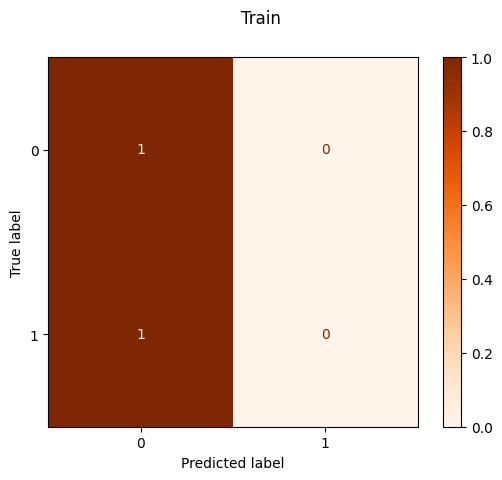

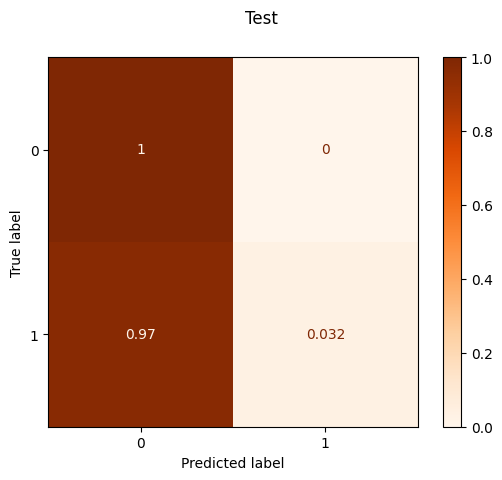

In [26]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_preds, 
               normalize='true', cmap='Oranges')
plt.suptitle('Train');



ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_preds, 
               normalize='true', cmap='Oranges')
plt.suptitle('Test');

In [27]:
#logreg.get_params()
#logreg.param_grid = {}
#dt_grid_search = GridSearchCV(logreg, logreg.param_grid)
#dt_grid_search.fit(X_train, y_train)
#dt_grid_search.best_params_

params = {'logisticregression__penalty': ['l1','l2'],
          'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

logreg2 = LogisticRegression(solver='liblinear')
logreg_pipe2 = make_pipeline(preprocessor, logreg2)

gs = GridSearchCV(logreg_pipe2, params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c95062da0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImpu...
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c950636d0>)])),
                                       ('logisticregression',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000, 10000],
                         'logisticregression__penalty': ['l1', 'l2']})

In [28]:
logreg = gs.best_estimator_

In [29]:
gs.best_params_

{'logisticregression__C': 0.0001, 'logisticregression__penalty': 'l1'}

In [30]:
logreg_best_model = gs.best_estimator_
logreg_best_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c92d07820>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c92d078e0>)])),
                ('logisticregression',
                 LogisticRegression(C=0.0001, penalty='l1',
                                    solver='liblinear'))])

In [31]:
evluate_classification(logreg_best_model, X_train, X_test, y_train, y_test)

Training Accuracy: 0.951
Test Accuracy: 0.951


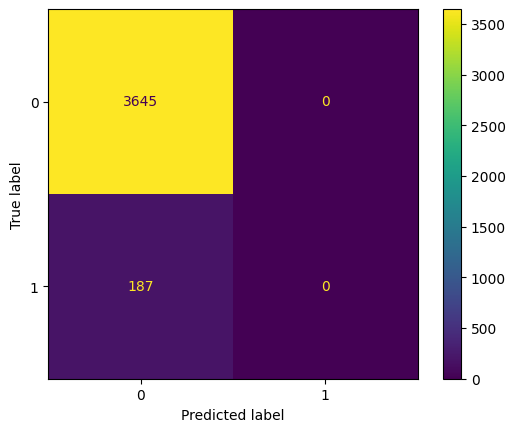

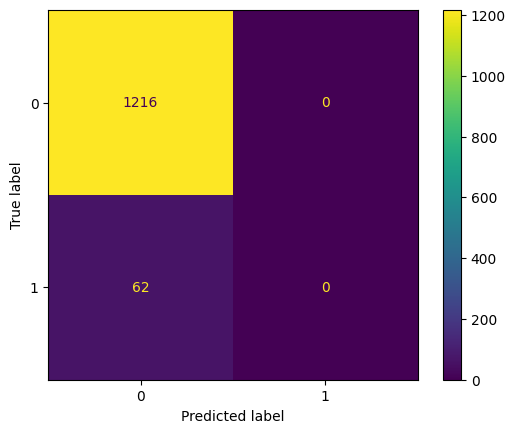

In [32]:
# on tuned logreg
tuned_train_pred = logreg_best_model.predict(X_train)
tuned_test_pred = logreg_best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_train, tuned_train_pred);
ConfusionMatrixDisplay.from_predictions(y_test, tuned_test_pred)

Based on the tested and tuned logistic regression model above, there are way too many false negatives and zero positives. This translates into many faulty predictions of individuals at risk of stroke based on the various selected health factors. I suggest utilizing a different model such as Random Forest to test out multiple predictions.

## **Data Set 2**

Source

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Brief Description of Data

'Adult Income' is a binary classification dataset which will experimented with models.  We will use this dataset to demonstrate how to evaluate a classification model on a binary classification problem.  Each record in this dataset correlates to adult income and each feature represents a demographic of an individual.

Our task will be to create a model that classifies income level based on an individual's personal information.

## **Load the Data**

In [33]:
#Load the Data
df2 = pd.read_csv('/content/adult.csv.zip')

## **Create a Copy of the Dataset**

In [34]:
backup_df2 = df2.copy()

## **Inspect the Data**

In [35]:
# Display the first (5) rows of the dataframe
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


A row in this data set displays the demographics and other features which correlates to an individual's income.

#### Check column names, shape, datatypes, and missing values

In [36]:
# Display the number of rows and columns for the dataframe
df2.shape
print(f'There are {df2.shape[0]} rows, and {df2.shape[1]} columns.')
print(f'The rows represent {df2.shape[0]} observations, and the columns represent {df2.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [37]:
# Display the column names, count of non-null values, and their datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [38]:
# Display the total number of missing values
print(f'There are {df2.isna().sum().sum()} missing values.')

There are 0 missing values.


- If there are no missing values we will not need to impute any. 
 - We will not need to use SimpleImputer in our preprocessing steps.

- **Never use fillna() to impute values prior to Train_Test_Split, as it would cause data leakage.**

#### Check for unusual or impossible values

In [39]:
## Display the descriptive statistics for the numeric columns
df2.describe(include="number") ## or 'object'

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
## Display the descriptive statistics for the non-numeric columns
df2.describe(include="object") # or 'number'

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


#### Inspect Values for Errors

In [41]:
# Inspect categorical columns for errors
cat_cols = make_column_selector(dtype_include='object')(df2)
for col in cat_cols:
  display(df2[col].value_counts(normalize=True))

Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64

Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64

Prof-specialty       0.126367
Craft-repair         0.125138
Exec-managerial      0.124606
Adm-clerical         0.114881
Sales                0.112690
Other-service        0.100794
Machine-op-inspct    0.061873
?                    0.057512
Transport-moving     0.048217
Handlers-cleaners    0.042423
Farming-fishing      0.030507
Tech-support         0.029606
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: occupation, dtype: float64

Husband           0.403669
Not-in-family     0.257627
Own-child         0.155215
Unmarried         0.104930
Wife              0.047725
Other-relative    0.030834
Name: relationship, dtype: float64

White                 0.855043
Black                 0.095922
Asian-Pac-Islander    0.031100
Amer-Indian-Eskimo    0.009623
Other                 0.008313
Name: race, dtype: float64

Male      0.668482
Female    0.331518
Name: gender, dtype: float64

United-States                 0.897424
Mexico                        0.019471
?                             0.017546
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam                       0.001761
Columbia                      0.001740
Haiti                         0.001536
Portugal                      0.001372
Taiwan                        0.001331
Iran                          0.001208
Greece                   

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

Some challenges one may foresee while cleaning, exploring and modeling this dataset can be the following:


*   Data Leakage
*   Duplicated, Inconsistent and/or Missing values

*   Class Imbalances
*   False Predictions and Sampling Errors





## **Clean the Data**

### Remove Unnecessary Rows

#### Duplicates

In [42]:
# Display the number of duplicate rows in the dataset
print(f'There are {df2.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [43]:
# Drop duplicate rows
df2.drop_duplicates(inplace=True)

In [44]:
# Confirm now duplicate rows remain
df2.duplicated().sum()

0

### Remove Unnecessary Columns

In [45]:
# convert column names to lower case
df2.columns = df2.columns.str.lower()
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Address Data Errors

#### Categorical

- All categorical columns will be encoded accordingly for machine learning models utilizing Simple Imputer.

Numerical

- Any outlier values will be addressed with Simple Imputer.

## **Model Validation Data Split**



### Check Class Balance

In [46]:
# Check how many samples of each class are present
df2['income'].value_counts(normalize = True)

<=50K    0.760586
>50K     0.239414
Name: income, dtype: float64

- Let's change 'income' to a binary value.

In [47]:
df2['income'] = df2['income'].replace({'<=50K':0, '>50K':1})

In [48]:
df2['income'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48790, dtype: int64>

### Split the Data

In [49]:
## Define features (X) and target (y)
target = 'income'

X = df2.drop(target, axis=1)
y = df2[target]
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


The target in this data set is "income". 

The target is 0 = Less than and/or equal to $50K,

or 1 = Greater than $50k.

In [50]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### Check Class Balance

In [51]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

0    0.760576
1    0.239424
Name: income, dtype: float64

In [52]:
# Check how many samples of each class are present for test
y_test.value_counts(normalize=True)

0    0.760616
1    0.239384
Name: income, dtype: float64

## **Preprocessing for Machine Learning**

In [53]:
# Transformers
scaler = StandardScaler()

# Pipeline
num_pipe = make_pipeline(scaler)

# Selector
num_selector = make_column_selector(dtype_include='number')

# Tuple
num_tuple = (num_pipe, num_selector)

In [54]:
# Transformers
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
freq_imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')

#Pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)

#Selector
cat_cols = make_column_selector(dtype_include='object')

#Tuple
cat_tuple = (cat_pipe, cat_cols)

In [55]:
## Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(num_tuple,
                                       cat_tuple,
                                       remainder='drop')

In [56]:
# fit on train
preprocessor.fit(X_train)

# Transforming train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check for missing values and that data is scaled and one-hot encoded
display(X_train_processed)

array([[ 0.24448739,  0.07032513, -0.41949016, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.90202829,  0.39011735, -0.02983732, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.02530708, -0.94882885,  1.13912121, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 2.58241061, -0.6688819 , -0.41949016, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.46366769,  1.7045572 ,  1.13912121, ...,  1.        ,
         0.        ,  0.        ],
       [-0.19387322,  0.17441803, -1.97810154, ...,  1.        ,
         0.        ,  0.        ]])

## **Modeling and Evaluating**

### K-Nearest Neighbors Model

In [57]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c92ae62c0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c92ae55d0>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [58]:
# Save the model's predictions for the train dataset
train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
test_preds = knn_pipe.predict(X_test)

In [59]:
train_knn_report = classification_report(y_train, train_preds)
test_knn_report = classification_report(y_test, test_preds)

In [60]:
# Classification Report for the Train dataset
# Save the Classification Report

print('Train\n', train_knn_report)

Train
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     27831
           1       0.78      0.70      0.74      8761

    accuracy                           0.88     36592
   macro avg       0.85      0.82      0.83     36592
weighted avg       0.88      0.88      0.88     36592



In [61]:
# Classification Report for the Test dataset
# Save the Classification Report


print('Test\n', test_knn_report)

Test
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      9278
           1       0.68      0.60      0.64      2920

    accuracy                           0.84     12198
   macro avg       0.78      0.76      0.77     12198
weighted avg       0.83      0.84      0.83     12198



Text(0.5, 1.0, 'Test CM')

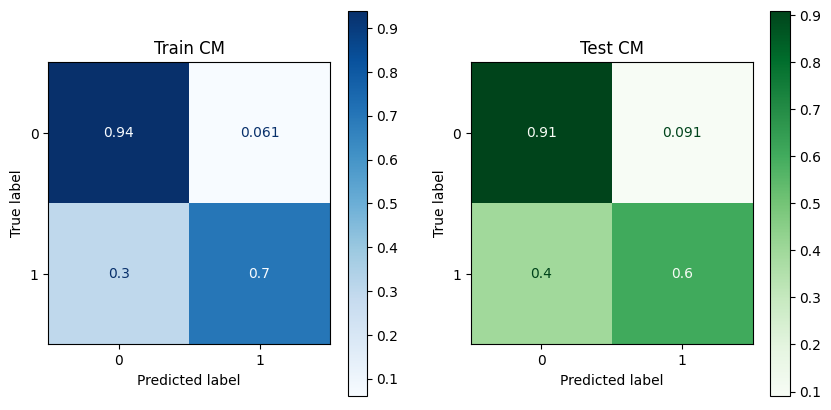

In [62]:
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',
                                        normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',
                                        normalize='true')

axes[1].set_title('Test CM')

### **Tune the Hyperparameters**

In [63]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c92ae62c0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='missing',
                                                                   strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.ma

In [64]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,20),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [65]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c92ae62c0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8c92ae55d0>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 20),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [66]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 19,
 'kneighborsclassifier__weights': 'uniform'}

In [67]:
knn_gs.best_score_

0.8416595777906389

In [68]:
best_knn = knn_gs.best_estimator_

In [69]:
#check the best parameter
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [70]:
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     27831
           1       0.73      0.63      0.68      8761

    accuracy                           0.86     36592
   macro avg       0.81      0.78      0.79     36592
weighted avg       0.85      0.86      0.85     36592

Test
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      9278
           1       0.70      0.60      0.65      2920

    accuracy                           0.84     12198
   macro avg       0.79      0.76      0.77     12198
weighted avg       0.84      0.84      0.84     12198



Text(0.5, 1.0, 'Test CM')

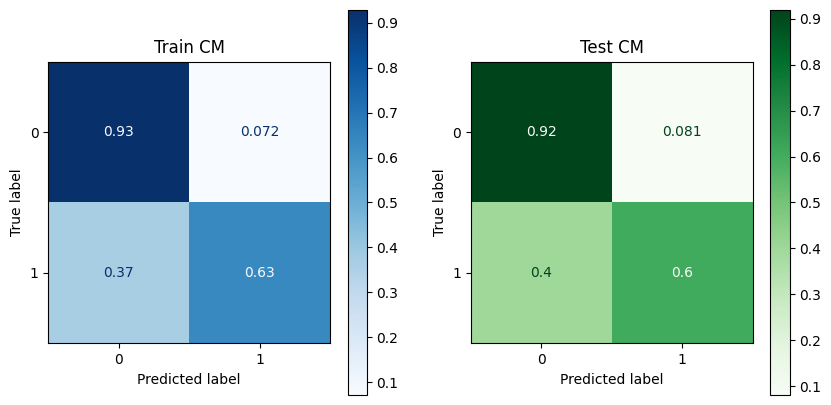

In [71]:
# Check the class balance again to help us choose a metric
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true')

axes[1].set_title('Test CM')

Based on the tested and tuned knn model above, results are modeling the dataset having 40% false negative predictions. This translates into inaccurate predictions of adult income more or less than $50K based on the selected demographics. Refining the demographics would help reduce the false negatives for more ideal modeling predictions.